#                                               Idea: Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Machine Learning Models
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier

In [3]:
df = pd.read_csv("WineQT.csv")

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [5]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.shape

(1143, 13)

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [10]:
df=df.dropna()

# Data Visualization

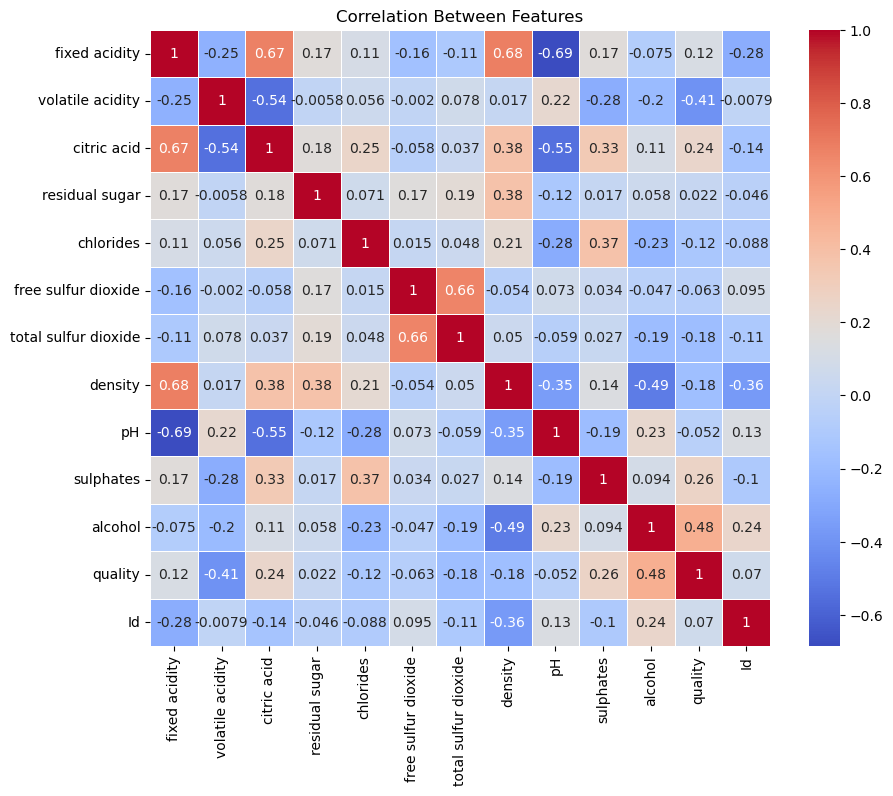

In [11]:
# Visualize correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Features")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


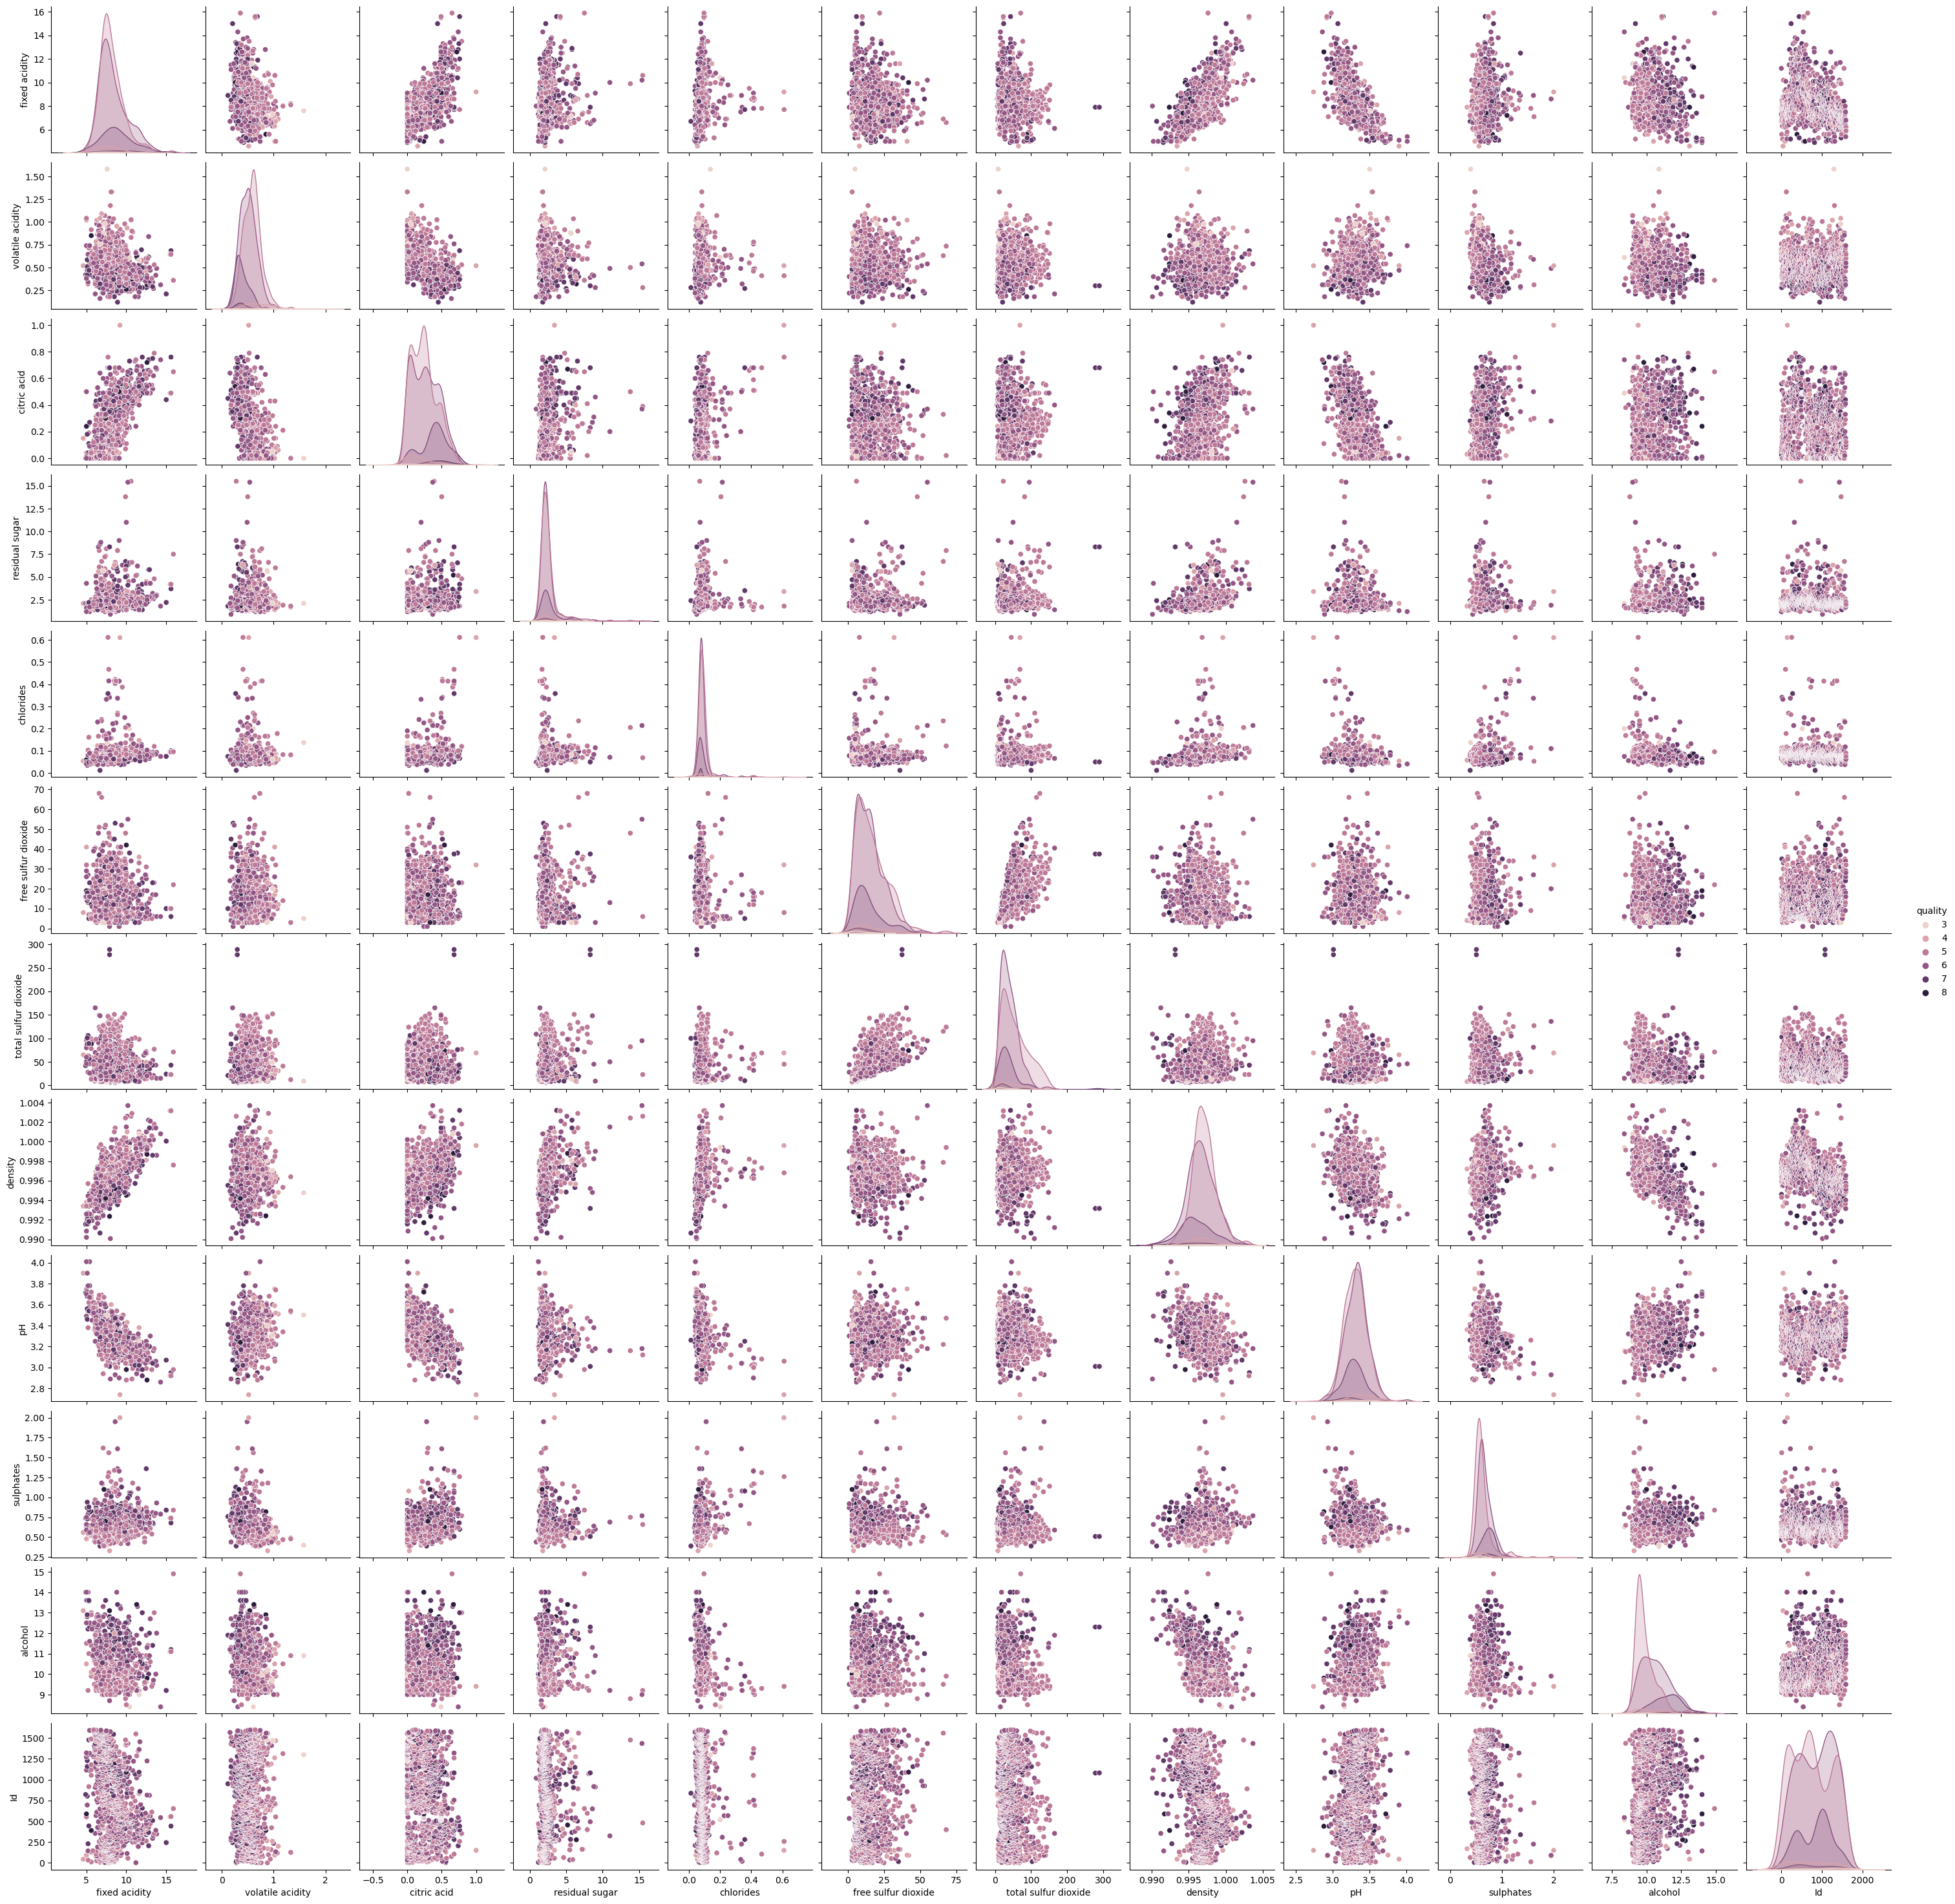

In [12]:
sns.pairplot(df, hue='quality')
plt.show()

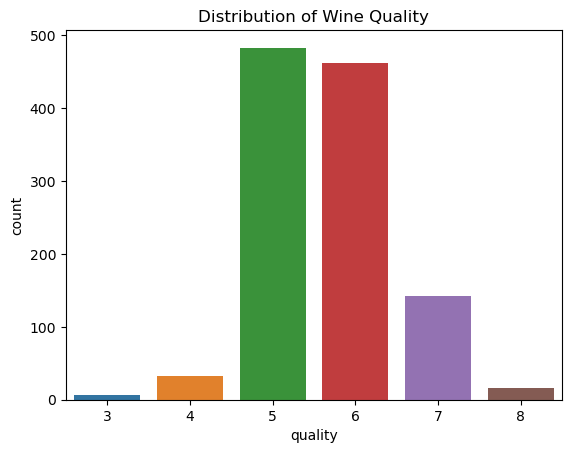

In [13]:
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

<Axes: >

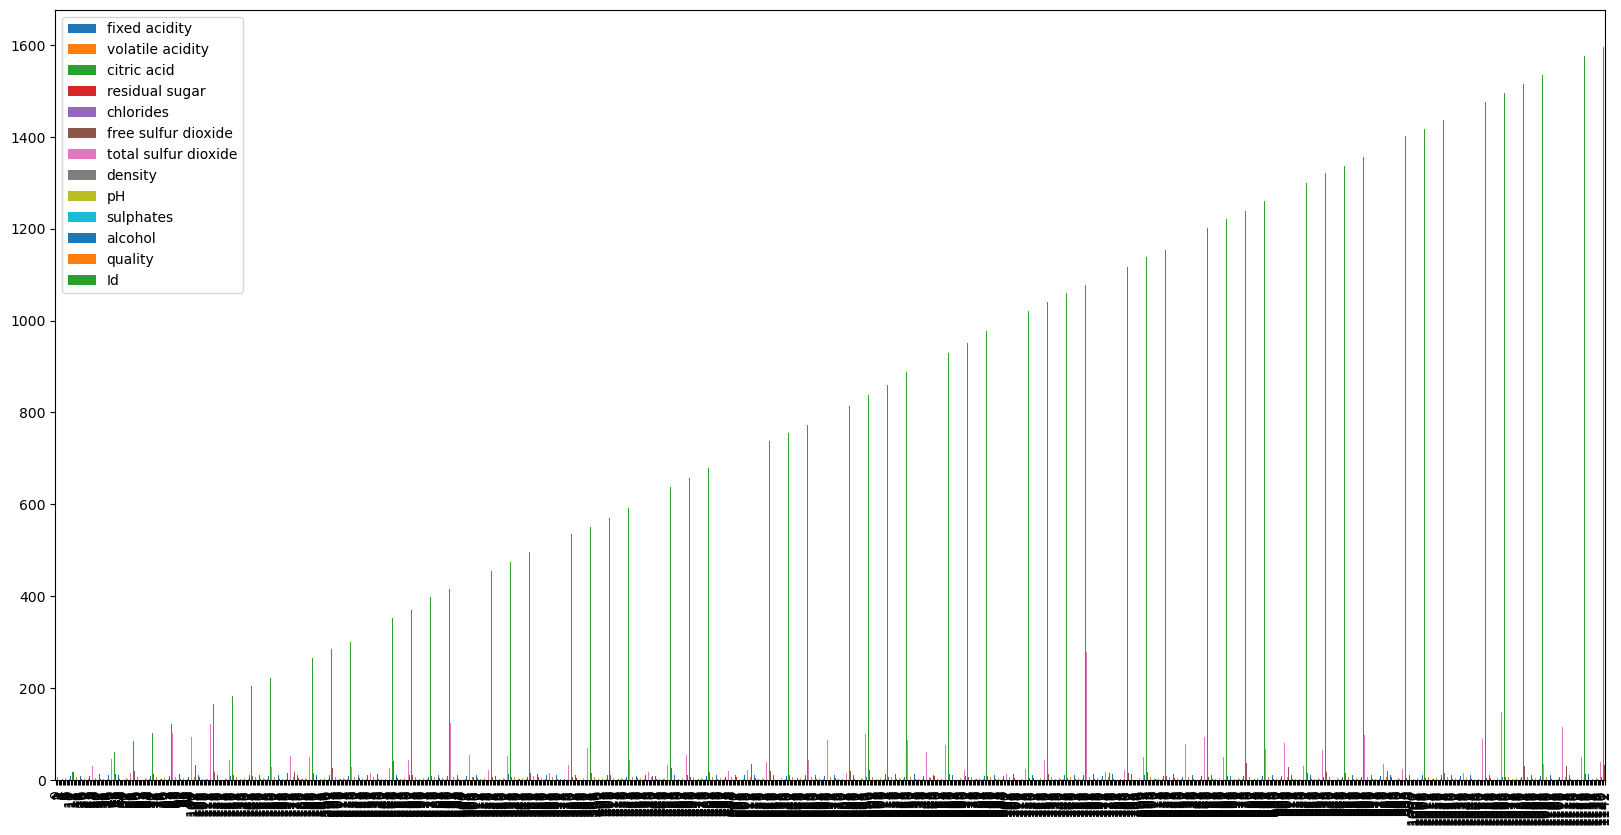

In [14]:
df.plot(kind="bar",figsize=(20,10))

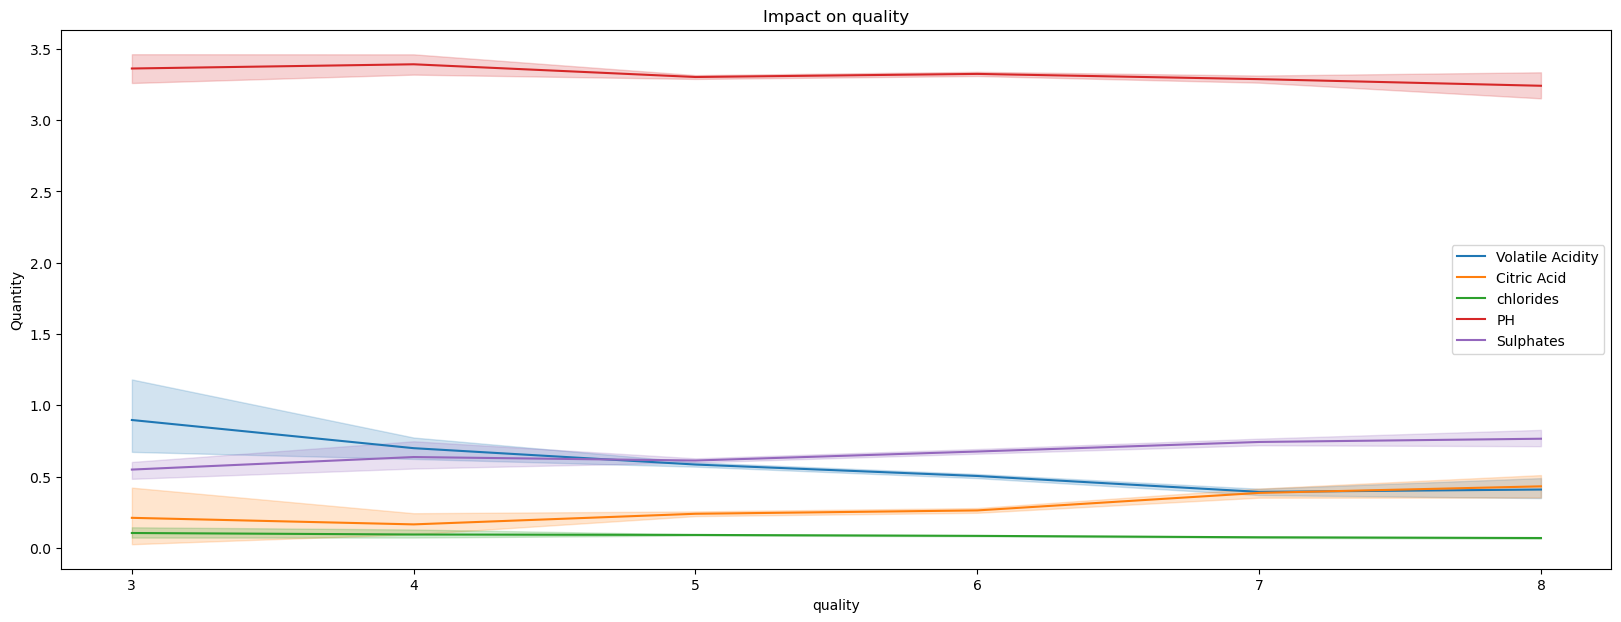

In [15]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

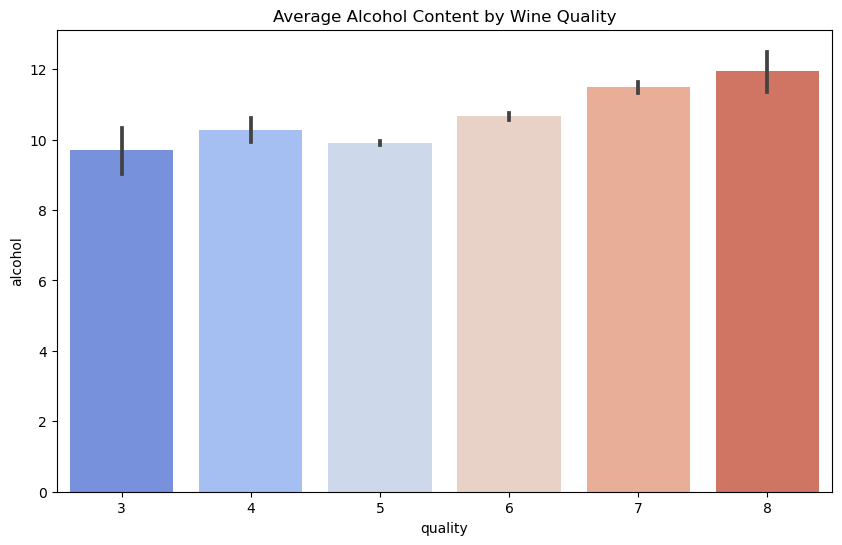

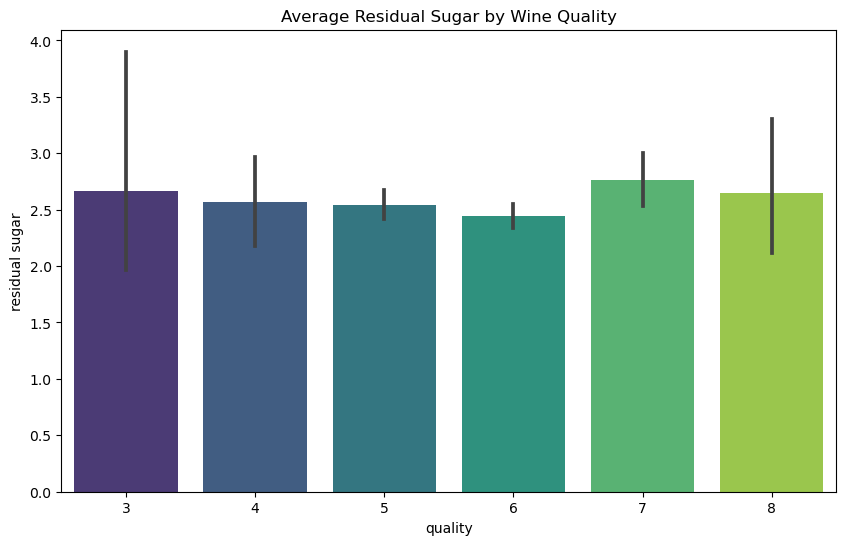

In [16]:
# Bar Plot of average alcohol content per wine quality
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=df, estimator='mean', palette='coolwarm')
plt.title('Average Alcohol Content by Wine Quality')
plt.show()

# Bar Plot of average residual sugar per wine quality
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='residual sugar', data=df, estimator='mean', palette='viridis')
plt.title('Average Residual Sugar by Wine Quality')
plt.show()

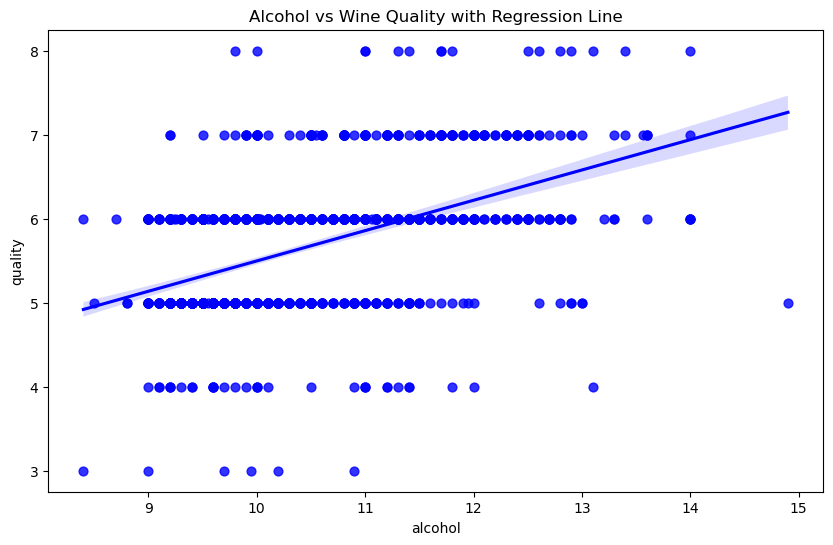

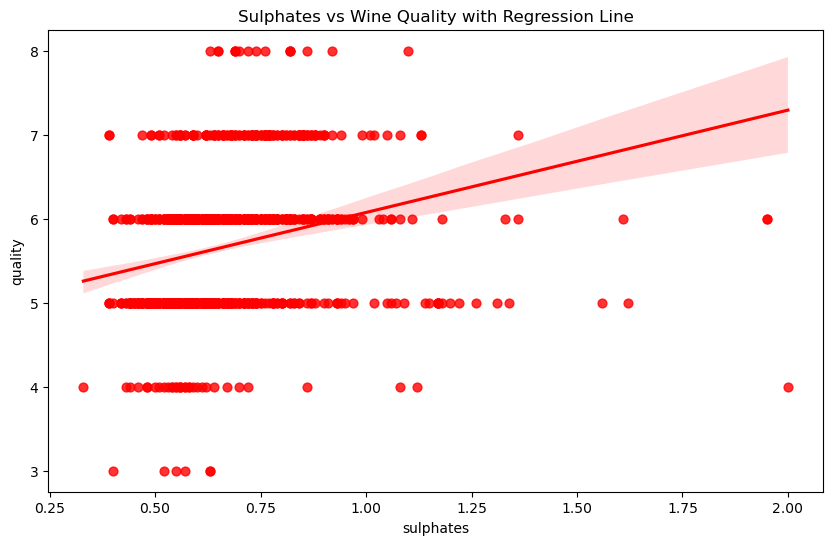

In [17]:
# Scatter Plot of alcohol vs quality with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='quality', data=df, scatter_kws={'s': 40}, color='blue')
plt.title('Alcohol vs Wine Quality with Regression Line')
plt.show()

# Scatter Plot of sulphates vs quality with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='sulphates', y='quality', data=df, scatter_kws={'s': 40}, color='red')
plt.title('Sulphates vs Wine Quality with Regression Line')
plt.show()

# APPLYING 'SMOTE' TO BALANCE CLASS IMBALANCING

In [18]:
X = df.drop('quality', axis=1)
y = df['quality']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Selection

In [19]:
X = df.drop('quality', axis=1)  # Features: all except 'quality'
y = X = df.drop('quality', axis=1)  # Features: all except 'quality'


Split the Data into Training and Testing Sets

In [20]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)


# Build and Train Models

Random Forest Classifier

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = rf.predict(X_test)

In [24]:
# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_rf}")

Accuracy Score: 0.8655172413793103


In [25]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[139   0   0   0   0   0]
 [  0 133   6   6   0   0]
 [  1   4 116  28   6   0]
 [  1   4  29  94  23   2]
 [  0   0   1   6 137   0]
 [  0   0   0   0   0 134]]
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       139
           4       0.94      0.92      0.93       145
           5       0.76      0.75      0.76       155
           6       0.70      0.61      0.66       153
           7       0.83      0.95      0.88       144
           8       0.99      1.00      0.99       134

    accuracy                           0.87       870
   macro avg       0.87      0.87      0.87       870
weighted avg       0.86      0.87      0.86       870



# Support Vector Classifier (SVC)

In [26]:
# Split data (from the SMOTE oversampling step)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)

In [27]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


SVC(C=1, random_state=42)

In [28]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           3       0.90      1.00      0.95       139
           4       0.79      0.85      0.82       145
           5       0.66      0.59      0.62       155
           6       0.58      0.55      0.56       153
           7       0.80      0.69      0.74       144
           8       0.88      1.00      0.94       134

    accuracy                           0.77       870
   macro avg       0.77      0.78      0.77       870
weighted avg       0.76      0.77      0.77       870

SVM Confusion Matrix:
[[139   0   0   0   0   0]
 [  5 123  12   5   0   0]
 [  8  19  91  29   6   2]
 [  2  10  33  84  19   5]
 [  0   3   2  28 100  11]
 [  0   0   0   0   0 134]]


# Stochastic Gradient Descent (SGD):

In [31]:
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

In [32]:
# Fit the model to the training data
sgd_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [33]:
# Make predictions
y_pred_sgd = sgd_model.predict(X_test)


In [34]:
"SGD Accuracy:", accuracy_score(y_test, y_pred_sgd)

('SGD Accuracy:', 0.5758620689655173)

In [35]:
"Classification Report:\n", classification_report(y_test, y_pred_sgd)

('Classification Report:\n',
 '              precision    recall  f1-score   support\n\n           3       0.93      1.00      0.96       139\n           4       0.46      0.61      0.52       145\n           5       0.49      0.47      0.48       155\n           6       0.34      0.20      0.25       153\n           7       0.51      0.47      0.49       144\n           8       0.66      0.77      0.71       134\n\n    accuracy                           0.58       870\n   macro avg       0.56      0.59      0.57       870\nweighted avg       0.56      0.58      0.56       870\n')

In [36]:
"Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd)

('Confusion Matrix:\n',
 array([[139,   0,   0,   0,   0,   0],
        [  7,  88,  22,  19,   9,   0],
        [  3,  46,  73,  19,   7,   7],
        [  1,  42,  37,  31,  29,  13],
        [  0,  14,  14,  15,  67,  34],
        [  0,   1,   3,   8,  19, 103]], dtype=int64))